In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
df=pd.read_csv("Churn_Modelling.csv")
df.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [76]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [3]:
df=df.drop(["CustomerId"],1)
df.head()

,RowNumber,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df=df.drop(["RowNumber"],1)

In [4]:
df=df.drop(["Surname"],1)
df.head()

,RowNumber,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
X=df.drop(["Exited"],1)
y=df["Exited"]

In [6]:
X=pd.get_dummies(X)
X.head()

,RowNumber,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,1,619,42,2,0.00,1,1,1,101348.88,1,0,0,1,0
1,2,608,41,1,83807.86,1,0,1,112542.58,0,0,1,1,0
2,3,502,42,8,159660.80,3,1,0,113931.57,1,0,0,1,0
3,4,699,39,1,0.00,2,0,0,93826.63,1,0,0,1,0
4,5,850,43,2,125510.82,1,1,1,79084.10,0,0,1,1,0


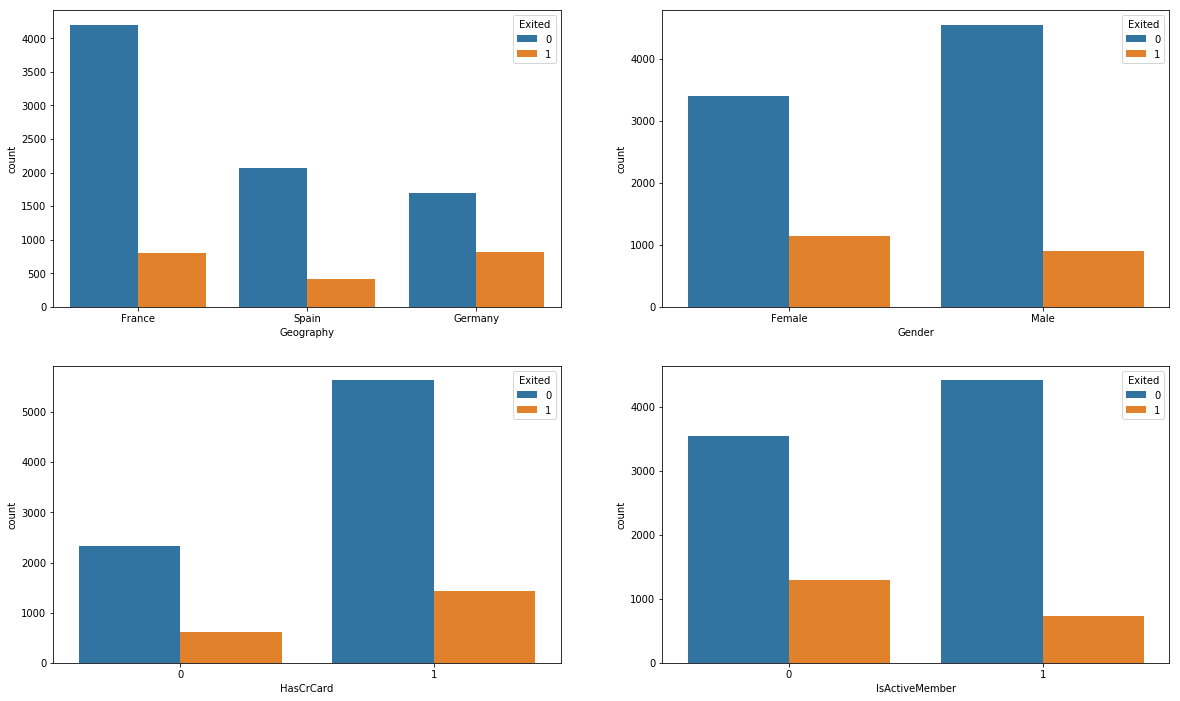

In [51]:
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
sns.countplot(x='Geography', hue = 'Exited',data = df, ax=axarr[0][0])
sns.countplot(x='Gender', hue = 'Exited',data = df, ax=axarr[0][1])
sns.countplot(x='HasCrCard', hue = 'Exited',data = df, ax=axarr[1][0])
sns.countplot(x='IsActiveMember', hue = 'Exited',data = df, ax=axarr[1][1])

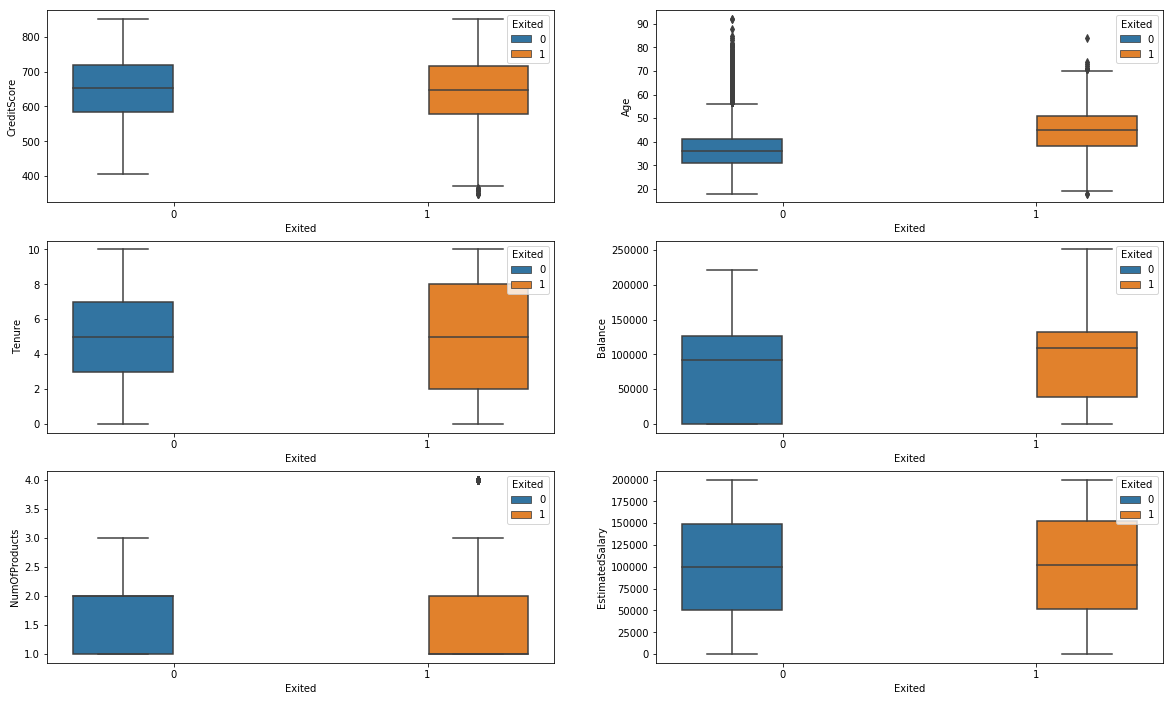

In [70]:
# Relations based on the continuous data attributes
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = df, ax=axarr[0][0])
sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = df , ax=axarr[0][1])
sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][0])
sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][1])
sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][0])
sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][1])

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
col_names=list(X)
X=scaler.fit_transform(X)
X=pd.DataFrame(X)
X.columns=col_names


In [8]:
X.head()

,RowNumber,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,0.0000,0.538,0.324324,0.2,0.000000,0.000000,1.0,1.0,0.506735,1.0,0.0,0.0,1.0,0.0
1,0.0001,0.516,0.310811,0.1,0.334031,0.000000,0.0,1.0,0.562709,0.0,0.0,1.0,1.0,0.0
2,0.0002,0.304,0.324324,0.8,0.636357,0.666667,1.0,0.0,0.569654,1.0,0.0,0.0,1.0,0.0
3,0.0003,0.698,0.283784,0.1,0.000000,0.333333,0.0,0.0,0.469120,1.0,0.0,0.0,1.0,0.0
4,0.0004,1.000,0.337838,0.2,0.500246,0.000000,1.0,1.0,0.395400,0.0,0.0,1.0,1.0,0.0


In [31]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error,accuracy_score
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier


In [57]:
from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train, y_test = tts(X,y, test_size = 0.3, random_state = 42)

In [ ]:
# KNN Classifier

In [68]:
knn = KNeighborsClassifier(n_neighbors=9)

In [67]:
knn.fit(X_train,y_train)
y_pred= knn.predict(X_test)
accuracy_score(y_test,y_pred)
print('Accuracy of KNN on test data:{:.3f}'.format(accuracy_score(y_test,y_pred)))

Accuracy of KNN on test data:0.804


In [63]:
#Confusion matrix for KNN:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_pred)
print(confusion_matrix)

[[2306  110]
 [ 467  117]]


In [11]:
# cross validation
cv_scores=cross_val_score(knn,X,y,cv = 10)
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

[0.81418581 0.7982018  0.81418581 0.814      0.801      0.803
 0.803      0.81381381 0.7957958  0.8038038 ]
cv_scores mean:0.8060986839986839


In [ ]:
# GridsearchCV for KNN hyper parameter tunning

In [52]:
param_grid = {'n_neighbors': np.arange(1, 25)}

In [53]:
knn_gscv = GridSearchCV(knn, param_grid, cv=5)

In [54]:
knn_gscv.fit(X, y)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [55]:
knn_gscv.best_params_


{'n_neighbors': 9}

In [56]:
knn_gscv.best_score_

0.8102

In [ ]:
#Logistic Regression 

In [40]:
from sklearn.linear_model import LogisticRegression

In [46]:
logreg = LogisticRegression()

In [47]:
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [65]:
y_pred=logreg.predict(X_test)
print('Accuracy of logistic on test data:{:.3f}'.format(logreg.score(X_test,y_test)))

Accuracy of logistic on test data:0.813


In [49]:
#Confusion matrix for logit:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_pred)
print(confusion_matrix)

[[2324   92]
 [ 469  115]]


In [14]:
# cross validation for logit
log_cv=cross_val_score(logreg,X,y,cv = 10, scoring="accuracy")
print(log_cv)
print('log_cv mean:{}'.format(np.mean(log_cv)))

[0.81018981 0.80919081 0.81718282 0.803      0.803      0.81
 0.817      0.81981982 0.81381381 0.8028028 ]
log_cv mean:0.8105999872999874
